# Ask gpt4v
> ask gpt4v via openai api

In [ ]:
#| default_exp vision.gpt4v

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#|export
from IPython.display import Image
import base64
import glob
import json
import openai
import requests

In [ ]:
#| eval: false
import os
from pathlib import Path

data_path = Path(os.getenv("LLMCAM_DATA", "../data")).absolute()
files = sorted(glob.glob(f"{data_path}/cap_*.jpg"))
len(files), files[:9]

(529,
 ['/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_15:59:06_Presidentinlinna.jpg',
  '/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_16:00:11_Presidentinlinna.jpg',
  '/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_16:01:16_Etelasatama.jpg',
  '/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_16:02:21_Etelasatama.jpg',
  '/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_16:05:31_Olympiaterminaali.jpg',
  '/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_16:06:36_Olympiaterminaali.jpg',
  '/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_16:07:41_Torni.jpg',
  '/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_16:09:51_Tuomiokirkko.jpg',
  '/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.09.28_16:15:11_Presidentinlinna.jpg'])

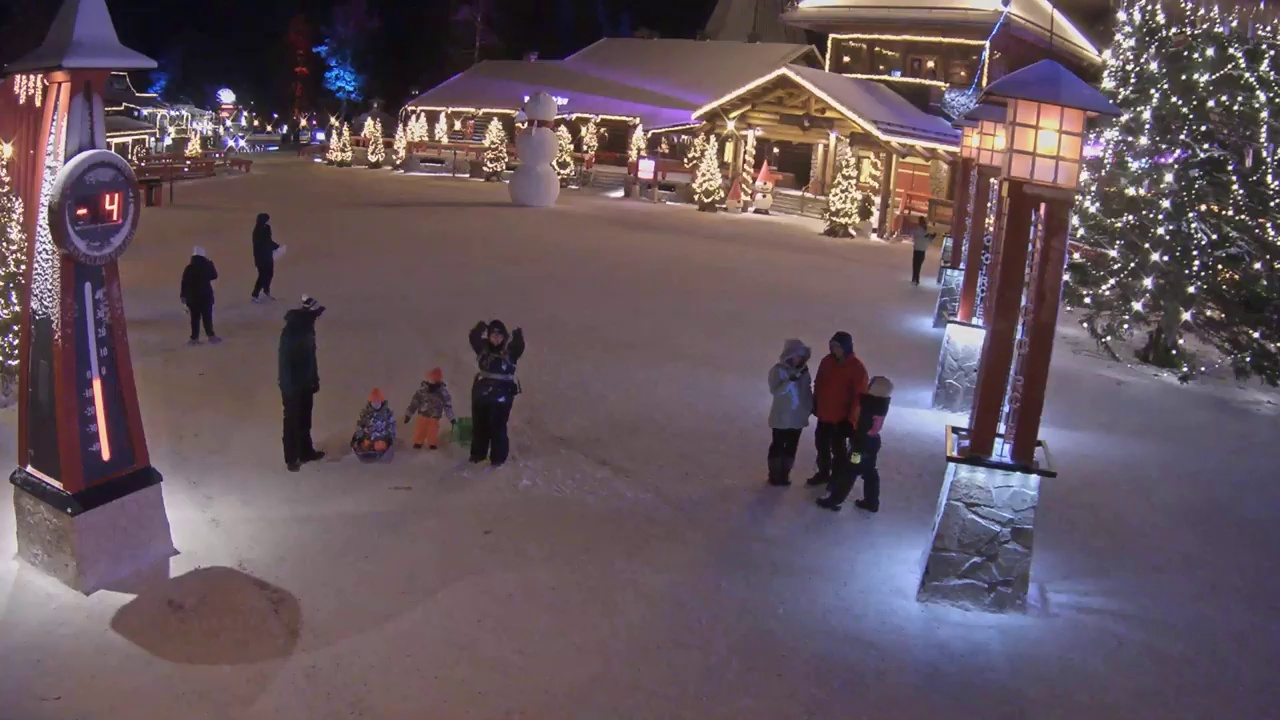

In [ ]:
#| eval: false
Image(files[-1])

In [ ]:
#|export
def encode_image(fname: str):
    "encode an image file as base64"
    with open(fname, "rb") as f:
        return base64.b64encode(f.read()).decode('utf-8')

In [ ]:
show_doc(encode_image)

---

[source](https://github.com/ninjalabo/llmcam/blob/main/llmcam/gpt4v.py#L17){target="_blank" style="float:right; font-size:smaller"}

### encode_image

>      encode_image (fname:str)

*encode an image file as base64*

In [ ]:
#| eval: false
base64_image = encode_image(files[0])
base64_image[:9]

'/9j/4AAQS'

In [ ]:
#|export
question = """
    Describe this image quantitatively as many as possible in json format. All the value should numbers.
    
    ##### EXAMPLE OUTPUT FORMAT
    {
        'timestamp': '2024-10-06T19:04:14',
        'location': 'Kauppatori',
        'dimensions': '1280 x 720',
        'building': 10,
        'buildings_height_range': '3-5 stories',
        'car': 5,
        'truck': 2,
        'boat': 4,
        'available_parking_space': 3,
        'street_lights': 20,
        'person': 10,
        'time_of_day': 'evening',
        'artificial_lighting': 'prominent',
        'visibility_clear': True,
        'sky_visible': True,
        'sky_light_conditions': 'dusk',
        'waterbodies_visible': True,
        'waterbodies_type': 'harbor'
    }
    """

In [ ]:
#| eval: false
response = openai.chat.completions.create(
  model="gpt-4o",
  messages=[{
        "role": "user",
        "content": [
            {"type": "text", "text": question,},
            {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{encode_image(files[-1])}", "detail":"high",},
            },
        ],
    }],
  max_tokens=300,
)

In [ ]:
#|export
def info(response):
    txt = json.loads(response.json())['choices'][0]['message']['content']
    data = json.loads(txt.replace('```json\n', "").replace('\n```', ""))
    return data

In [ ]:
#|export
def ask_gpt4v(fn:str) -> str:
    response = openai.chat.completions.create(
      model="gpt-4o",
      messages=[{
            "role": "user",
            "content": [
                {"type": "text", "text": question,},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{encode_image(fn)}", "detail":"high",},
                },
            ],
        }],
      max_tokens=300,
    )
    return info(response)

In [ ]:
#| eval: false
ask_gpt4v(files[-1])
info(response)

/tmp/ipykernel_23552/3662573563.py:3: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  txt = json.loads(response.json())['choices'][0]['message']['content']


{'timestamp': '2023-10-06T19:04:14',
 'location': 'unknown',
 'dimensions': '1280 x 720',
 'building': 3,
 'buildings_height_range': '1-2 stories',
 'car': 0,
 'truck': 0,
 'boat': 0,
 'available_parking_space': 0,
 'street_lights': 6,
 'person': 9,
 'temperature': -4,
 'time_of_day': 'evening',
 'artificial_lighting': 'prominent',
 'visibility_clear': True,
 'sky_visible': False,
 'sky_light_conditions': 'night',
 'waterbodies_visible': False,
 'snow_coverage': 'full'}

In [ ]:
#|hide
import nbdev; nbdev.nbdev_export()